### Exploratory Data Analysis (EDA) 

Name: Darren King
Student ID: 17145031

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Load the requisite csv file into a dataframe

df = pd.read_csv('bank.csv')

In [3]:
#Let's have a peek at the data - print the 1st 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [4]:
#Let's have a peek at the data - Print the last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


The dataframe has 2000 rows containing both numerical and non-numerical or categorical data relating to direct marketing campaigns of a Portuguese banking institution. 
As per the UCI Machine Learning Repository bank.csv contains 17 inputs (or attributes) and relates to 10% of the bank-additional-full.csv dataset.

The attributes considered are:

Bank client data:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - balance
7 - housing: has housing loan? (categorical: 'no','yes','unknown')
8 - loan: has personal loan? (categorical: 'no','yes','unknown')

The following attributes are related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: 'cellular','telephone') 
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

17 - Subscribed - Did the client subscribe to a term deposit account - yes or no. 

### EDA of Numerical Attributes

Calculate statistics for the numerical attributes. Draw a short conclusion (approx. 150 words in a markdown cell)

I have commented and discussed in different markdown cells on the numerical statistics as I go through each of the points. 

In [5]:
# Let's have a look at a statistical summary for all the numerical attributes of the dataframe

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
# If we transpose this data it might appear a little clearer.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1988.0,41.753018,12.724358,18.0,32.00,38.0,50.0,93.0
balance,2000.0,1413.663500,3131.224213,-980.0,201.50,551.0,1644.5,81204.0
day,2000.0,13.851500,9.712189,1.0,5.00,12.0,23.0,31.0
duration,2000.0,292.020500,221.557295,7.0,146.00,236.0,379.0,1823.0
campaign,2000.0,1.909500,1.378862,1.0,1.00,1.0,2.0,11.0
pdays,2000.0,167.896000,131.754126,-1.0,75.75,182.0,251.0,854.0
previous,2000.0,2.561500,3.400735,0.0,1.00,2.0,3.0,55.0


From this we can see that there is missing data on the age of 12 of the customers. We can determine this number as a percentage (as demonstrated in the next cell). It's rather interesting that a bank wouldn't have this basic data on a client given one surely needs to know a clients DOB before opening a bank account - let's look at whether or not those for who we do not have an age opened a term deposit account (2 cells down). 
The mean age of the customers contacted was 41.7 years. 
The mean bank balance of the customers was 1413.66 with some lucky individual having 81204 in their account at the time these calls were made. This likely accounts for the skew in the data as seen with the mean income being 1413 and the median being 551.
The mean number of times an individual was called was 1.9 with some individual(s) being called 11 times (this is why nobody answers the phone to banks anymore). 

In [7]:
#Number of clients for whom we do not have an age
print(df.age.isna().sum())

#Percentage of clients for whom we do not have an age
df.age.isna().mean()*100

12


0.6

In [8]:
# Did anyone for whom the bank did not have an age open a bank account

no_age_and_subscribed = df[df.age.isna() & (df['subscribed'] == 'yes')]
no_age_and_subscribed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1171,NaN,retired,married,tertiary,no,2812,no,no,cellular,3,aug,392,4,181,3,success,yes
1232,NaN,student,single,secondary,no,431,no,no,cellular,19,aug,418,11,185,5,success,yes
1408,NaN,self-employed,single,tertiary,no,251,no,no,cellular,12,jul,537,1,-1,0,NaN,yes


As the default for head() is 5 values and we only have 3, this means there were 3 individuals who subscribed for a term deposit account for which the bank has no age information. Dodgy dodgy. 

Let's do some correlation analysis between age and bank balance

In [9]:
#Picking out the numerical data
df.select_dtypes("number")

,age,balance,day,duration,campaign,pdays,previous
0,32.0,392,1,957,2,131,2
1,39.0,688,1,233,2,133,1
2,59.0,1035,1,126,2,239,1
3,47.0,398,1,274,1,238,2
4,54.0,1004,1,479,1,307,1
...,...,...,...,...,...,...,...
1995,20.0,2785,16,327,2,-1,0
1996,28.0,127,16,1334,2,-1,0
1997,81.0,1154,17,231,1,-1,0
1998,46.0,4343,20,185,1,-1,0


In [10]:
#Let's look at the bank balances first 

df.balance.describe()

count     2000.000000
mean      1413.663500
std       3131.224213
min       -980.000000
25%        201.500000
50%        551.000000
75%       1644.500000
max      81204.000000
Name: balance, dtype: float64

So we can see that all 2000 clients have a bank balance with a mean balance of 1413.6635, someone is 980 overdrawn and as repeatedly mentioned, some lucky lad has 81204 waiting for a shopping spree. 

<AxesSubplot:title={'center':'Bank Balance Histogram'}, xlabel='Balance', ylabel='Client Numbers'>

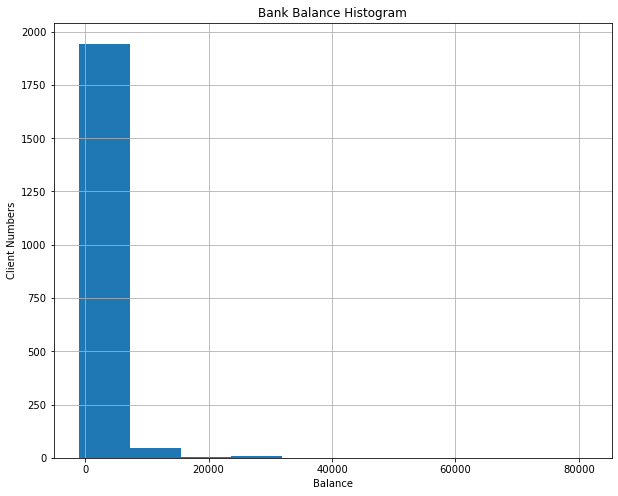

In [11]:
#What does this look like as a histogram?

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Bank Balance Histogram')
ax.set_xlabel("Balance")
ax.set_ylabel("Client Numbers")
df.balance.hist(ax=ax)

We can see that this plot is quite skewed based on the x axis - this is secondary to the max outlier who has a lovely balance of 81204. The histogram really allows us to see the skew caused by outliers. 

<AxesSubplot:title={'center':'Bank Balance Histogram'}, xlabel='Balance', ylabel='Client Numbers'>

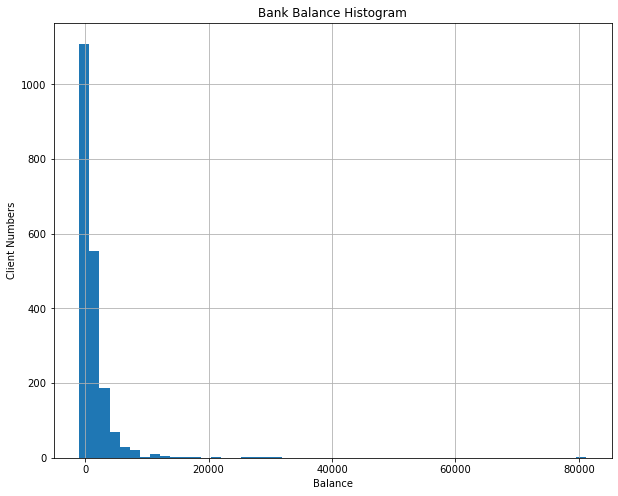

In [12]:
#Increase the number of bins to see what behaviours the skew might be hiding. 

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Bank Balance Histogram')
ax.set_xlabel("Balance")
ax.set_ylabel("Client Numbers")
df.balance.hist(ax=ax, bins=50)

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Bank Balance Distribution Plot'}, xlabel='balance', ylabel='Density'>

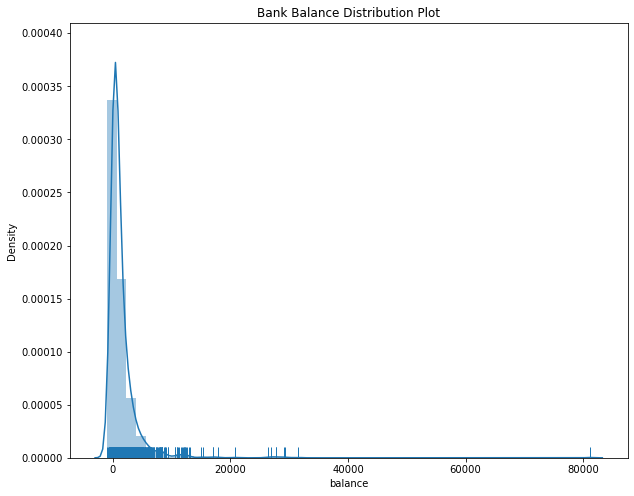

In [13]:
#We can create a distribution plot consisting of a histogram, a KDE and a rug plot to better understand 
#the bank balance distribution 

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Bank Balance Distribution Plot')
sns.distplot(df.balance, rug=True, ax=ax)

From the distribution plot we can see that lovely outlier, we can also see the little spikes as part of the rug plot.
The KDE (Kernel Density Estimation) allows us to visualise the probability desnity function (PDF) of the bank balance, which is a random variable. 

We could equally visualise this data as a boxplot, violin polt or boxen plot as below:

/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/darrenking/miniforge3/envs/env_ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

<AxesSubplot:xlabel='balance'>

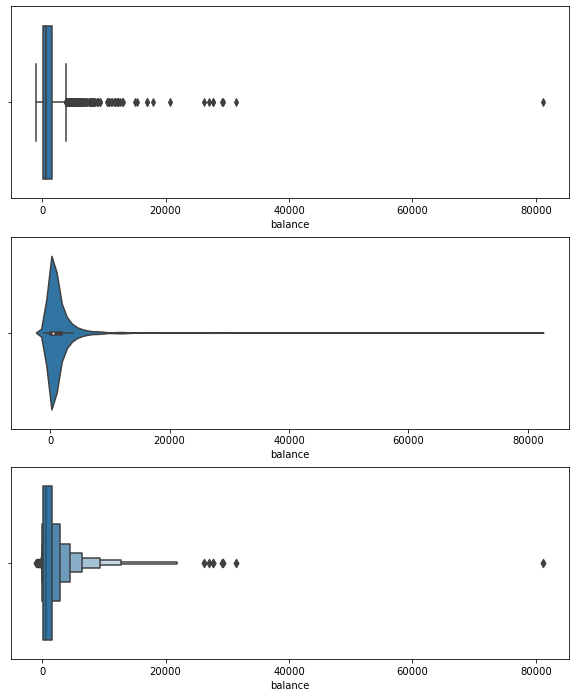

In [14]:
fig, axs = plt.subplots(nrows=3, figsize=(10,12))
sns.boxplot(df.balance, ax = axs[0], fliersize=5)
sns.violinplot(df.balance, ax = axs[1])
sns.boxenplot(df.balance, ax = axs[2])

We could look at whether these balances are 'normal' by determining the p-value of the distribution. 

In [29]:
stats.kstest(df.balance, cdf="norm")

KstestResult(statistic=0.9036501019683699, pvalue=0.0)

With this p-value, the data is not normal, and we can look at this graphically. 

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([ -980,  -768,  -744, ..., 29340, 31472, 81204])),
 (1947.0768430357434, 1413.6635000000003, 0.6210430643297318))

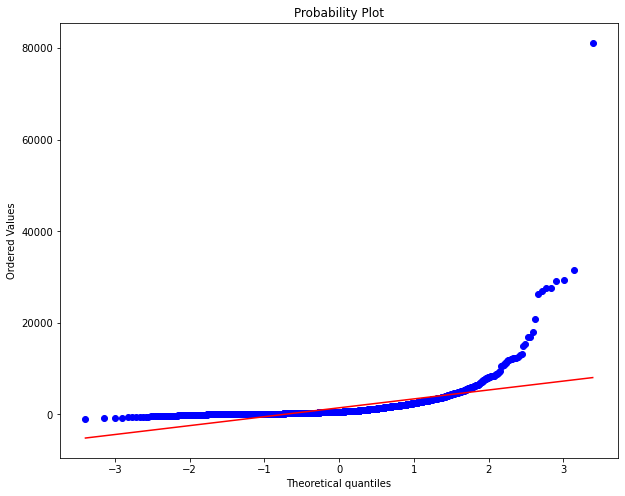

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
stats.probplot(df.balance, plot=ax)

Relatively speaking, the values track the normal line for a large number of the value, but then the high balances throw the normal distribution off so we don't have a 'normal' distribution. It would be interesting to see if we have a normal distribution as far as the age profile of the banks clients is concerned. In order to do that we'd have to clean the age data as we know there are NaN values in there and statistical testing requires entirley numerical data. 

In [32]:
stats.kstest(df.age, cdf="norm")

KstestResult(statistic=nan, pvalue=nan)

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([18., 19., 19., ..., nan, nan, nan])),
 (nan, nan, nan))

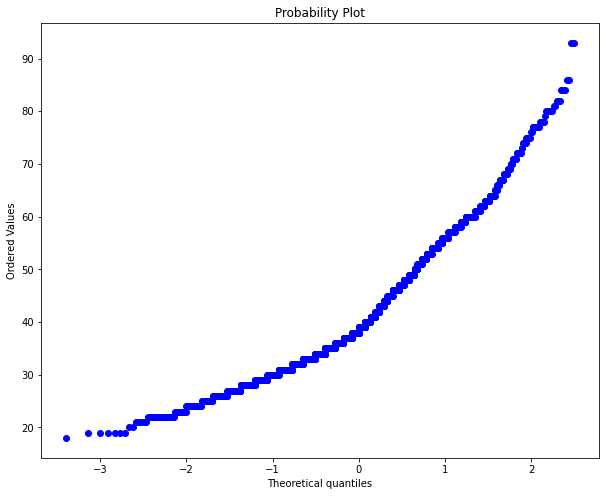

In [31]:
fig,ax = plt.subplots(figsize=(10,8))
stats.probplot(df.age, plot=ax)

In [15]:
#Can we clean the data and remove outliers  - WIP
pass

The heat map suggests there is little correlation between the numerical attributes. 

### EDA of Categorical Attributes

Calculate statistics for the categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell)

I have commented and discussed in different markdown cells on the categorical statistics as I go through each of the points. 

In [16]:
# We can select all categorical attributes by selecting object datatypes from the df

print(df.select_dtypes(object).columns)

# With the cardinality of the catergorical attributes determined by:

df.marital.nunique()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')


3

In [17]:
df['job'].count()

1990

In [18]:
 df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [19]:
df.job.isna().sum()

10

We don't have data on the jobs of 10 clients, which we can see from both counting the number who have a job and counting the number who do not have a job. 
I wonder if any of those 10 individuals have either a personal or a housing loan as I'd love to know how to get a loan without telling the bank your employment status or nature of your job.

In [20]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no


In [21]:
no_job_and_has_a_loan = df[df.job.isna() & ( (df['housing'] == 'yes') | (df['loan'] == 'yes') )]
no_job_and_has_a_loan.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,42.0,NaN,single,primary,no,2398,yes,no,cellular,3,feb,144,2,271,2,failure,no
831,41.0,NaN,single,primary,no,2398,yes,no,NaN,8,may,287,2,-1,0,NaN,no


As can be seen there's a 41 and a 42 year old with exactly the same bank balance, a primary level education and a housing loan each and the bank doesn't even know what they do for a living to earn the money to pay the bank for the housing loan. Considering relocating to Portugal.  

In [22]:
# Let's look a bit deeper at the non-numerical or categorical data

df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


From this quick analysis of the non numerical or categorical attributes we can see that over half the banks clients are married, nearly half have a secondary level education, management is the most common job and the greatest number of clients were contacted last in February.

I'm curious as to whether or not there's a correlation between education and being in credit default. 

In [23]:
df.education.value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [24]:
df.default.value_counts()

no     1985
yes      15
Name: default, dtype: int64

As we can see, there's very few people in default, let's see if, for the small set, there's any correlation between education and having credit in default default

### Distribution Analysis of Numerical Attributes

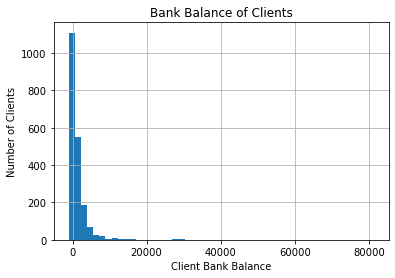

In [25]:
df['balance'].hist(bins=50)
plt.title("Bank Balance of Clients")
plt.xlabel('Client Bank Balance')
plt.ylabel('Number of Clients')
plt.show()

Due to outliers the X values extend quite high and take away from the core of the graph which highlights that the vast majority of the banks clients have relatively little money in their accounts.
We can use a boxplot to depict the same thing.

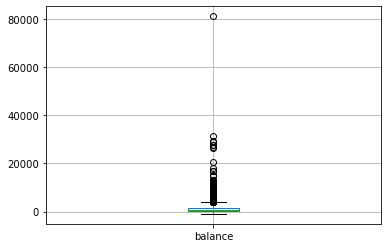

In [26]:
df.boxplot(column='balance')
plt.show()

How does this compare when we seperate for martial status?

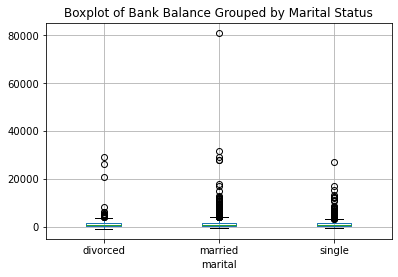

In [27]:
df.boxplot(column='balance', by='marital')
plt.title("Boxplot of Bank Balance Grouped by Marital Status")
plt.suptitle("")
plt.margins(x = 500)
plt.show()

In [28]:
#That outlier is causing some problems